In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Salary_dataset.csv")

In [4]:
print (data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [5]:
x= pd.DataFrame(data.YearsExperience)
y=pd.DataFrame(data.Salary)

m=len(y)

Text(0, 0.5, 'Salary')

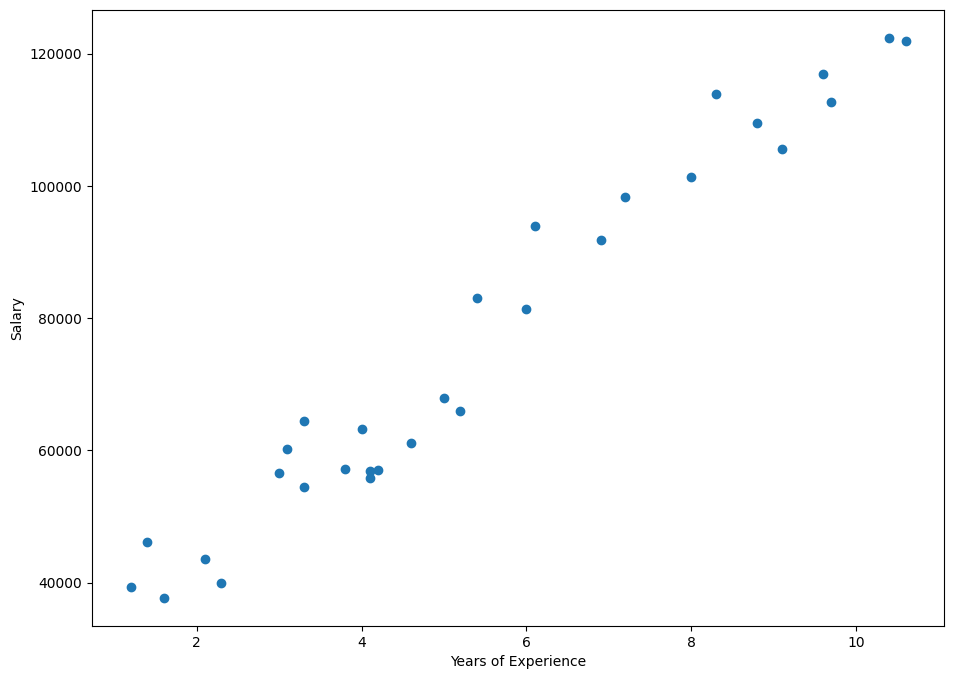

In [6]:
plt.figure(figsize=(11,8))
plt.scatter(x,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Profit')

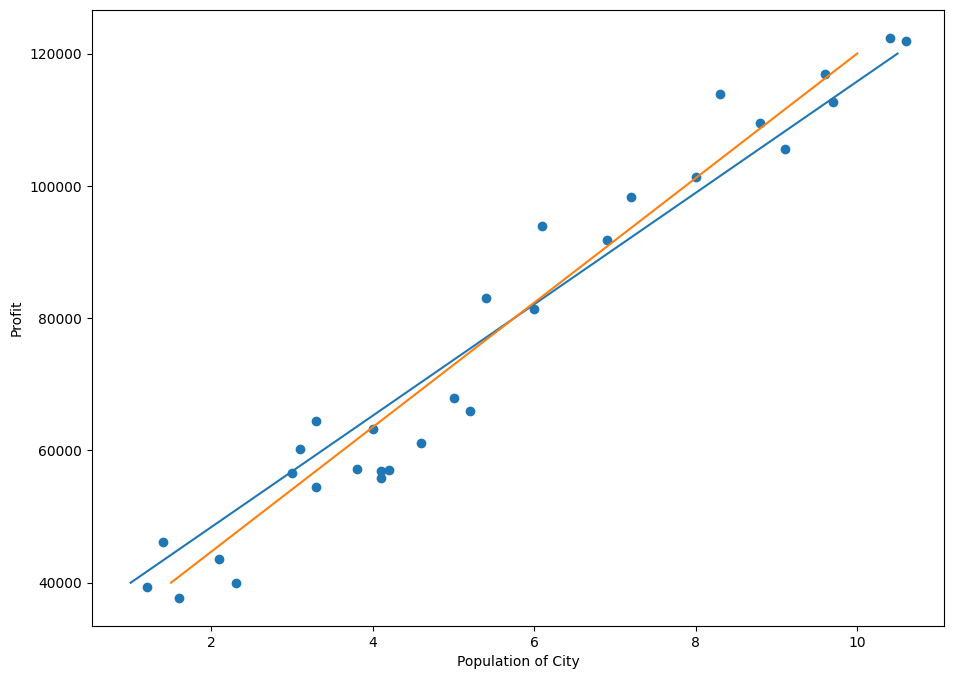

In [7]:
#Sample Graph plot for linear regression
plt.figure(figsize=(11,8))
plt.scatter(x, y)
plt.plot([1,10.5], [40000,120000], '-')#plot([x1,x2],[y1,y2])
# plt.plot([2, 10], [30000,130000], '-')
plt.plot([1.5, 10], [40000,120000], '-')
plt.xlabel('Population of City')
plt.ylabel('Profit')

In [8]:
iteration=1500
a=0.01

In [9]:
x['intercept'] = 1

Let's go through a simple example to illustrate the purpose of adding an intercept term to the feature matrix in linear regression.

Suppose you have a dataset with one feature (Years of Experience) and a target variable (Salary). Your data might look like this:

plaintext

YearsExperience | Salary
-------------------------
      1         |  50000
      2         |  55000
      3         |  60000
      4         |  65000
      5         |  70000

Now, you want to perform linear regression to predict the salary based on years of experience. The linear regression model is represented as:

hθ(x)=θ0+θ1⋅YearsExperience

However, to use this equation in a vectorized form and to allow the model to learn both the intercept (θ0) and the coefficient (θ1), you need to create a feature matrix that includes a column of 1s (intercept term).

Here's how the feature matrix would look after adding the intercept term:

plaintext

Intercept | YearsExperience
---------------------------
    1     |       1
    1     |       2
    1     |       3
    1     |       4
    1     |       5

Now, the linear regression model can be expressed as:

hθ(x)=θ0⋅Intercept+θ1⋅YearsExperience

The intercept term (θ0) allows the line to have an offset from the origin, and the model can learn both the slope and the intercept during training.

In code, you achieve this by adding a column of 1s to your feature matrix, and that's what the line x['intercept'] = 1 is doing. The resulting feature matrix is then used in the linear regression model.

In [10]:
X=np.array(x)
Y=np.array(y).flatten()
theta=np.array([0,0])


The flatten() function is used to convert a NumPy array from a multi-dimensional array to a one-dimensional array.

In [11]:
def cost_function(X,Y,theta):
    m=len(Y)
    '''
    J=(1/2m)* SUMMATION(X*theta - Y)**2
    '''
    J=np.sum((X.dot(theta)-Y)**2)/2/m
    return J

In [12]:
cost_function(X,Y,theta)

3251553638.866667

In [13]:
def gradient_descent(X,Y,theta,a,iteration):
    cost_history = [0] * iteration

    for i in range(iteration):
        #step1
        hypo=X.dot(theta)
        #step2
        loss= hypo -Y
        #step3
        gradient=X.T.dot(loss)/m
        #step4
        theta = theta - a*gradient
        #step5
        cost = cost_function(X,Y,theta)
        #step6
        cost_history[i]=cost

    return theta, cost_history

cost history is made to store all the values in array form so it is multiplied to iteration to make the array size equal to the iteration

In for loop

Step 1: multiply the X matrix to the theta matrix will get hypothesis(hypo)

Step 2: Find the loss from hypothesis(Predicted Value) - Y(Actual value)

Step 3: Now find the gradient that is by transpose of x matrix multiplied with the loss and divided the m giving the partial derivatives of the function
                    ∇J(θ)=1/m * XT * (loss)

Step 4: Calculating theta with the below formula
                    θ = θ − a *1/m * X^T * (X*θ - Y)

Step 5: Now after finding the theta we will find the cost using the cost function formula
                    J(θ)=1/2m * ∑i=1-m (hθ(x(i))−y(i))2

Step 6: the value of the cost is then added to the cost history for plotting in array form



NOTE:-
Here, X.T is the transpose of the feature matrix X. This is done to perform matrix multiplication with the loss vector. The dot() method then computes the dot product between the transposed matrix and the loss vector.
In the context of linear regression and gradient descent, the transpose operation is often used to calculate gradients efficiently. It is a common mathematical operation when dealing with vectorized implementations of machine learning algorithms.

In [14]:
(t,c) = gradient_descent(X,Y,theta,a,iteration)

In [15]:
print(t)
print("M =", t[0])
print("C =", t[1])

[ 9604.00088843 23798.65974533]
M = 9604.000888426282
C = 23798.65974532947


In [16]:
## Plotting the best fit line
best_fit_x = np.linspace(0, 10, 2)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

LINE 1 :This line uses NumPy's linspace function to generate evenly spaced values over a specified range. In this case, it creates an array of 20 points between 0 and 25 (inclusive). These values represent the x-coordinates along which you want to plot the best-fit line.

LINE 2: This line calculates the corresponding y-coordinates for the best-fit line. It uses a list comprehension to iterate over each value in best_fit_x and computes the y-coordinate for each point using the linear regression equation:
                        y=θ1 + θ0 * x

Text(0.5, 1.0, 'Salary vs. Years of Experience with Linear Regression Line')

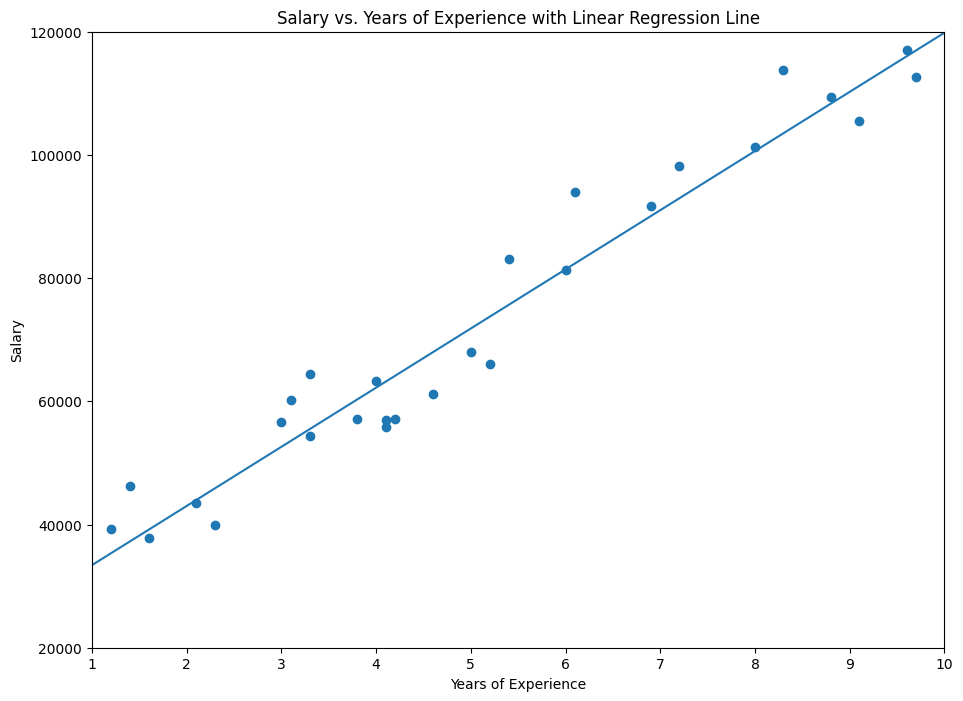

In [17]:
plt.figure(figsize=(11,8))
plt.scatter(x.YearsExperience, y.Salary)
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([1,10,20000,120000])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience with Linear Regression Line')